In [1]:
import pandas as pd

import matplotlib.pyplot as plt


In [2]:
housing_data = pd.read_csv('Datasets/housing.csv')
housing_data.sample(5)

FileNotFoundError: [Errno 2] File b'Datasets/housing.csv' does not exist: b'Datasets/housing.csv'

In [8]:
housing_data = housing_data.dropna()

In [10]:
housing_data.shape

(20433, 10)

In [14]:
housing_data.loc[housing_data['median_house_value']==500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [17]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value']==500001].index)

In [37]:
housing_data.shape

(19475, 14)

In [38]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [39]:
housing_data['ocean_proximity'].unique()

KeyError: 'ocean_proximity'

In [35]:
#We are using one hot encoding here
housing_data = pd.get_dummies(housing_data,columns=['ocean_proximity'])

KeyError: "None of [Index(['ocean_proximity'], dtype='object')] are in the [columns]"

In [40]:
housing_data.shape

(19475, 14)

In [44]:
housing_data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [45]:
X = housing_data.drop('median_house_value', axis = 1)
Y = housing_data ['median_house_value']

In [49]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [55]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [57]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [61]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression (normalize=True).fit(x_train, y_train)

In [63]:
print ('Training Score:', linear_model.score(x_train,y_train))

Training Score: 0.6100282610268317


In [66]:
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [69]:
coef=pd.Series(linear_model.coef_,predictors).sort_values()
print(coef)

ocean_proximity_INLAND       -7.697413e+17
ocean_proximity_NEAR BAY     -7.697413e+17
ocean_proximity_<1H OCEAN    -7.697413e+17
ocean_proximity_NEAR OCEAN   -7.697413e+17
ocean_proximity_ISLAND       -7.697413e+17
longitude                    -2.529534e+04
latitude                     -2.340778e+04
population                   -2.950078e+01
total_rooms                  -7.775773e+00
households                    4.799945e+01
total_bedrooms                8.832941e+01
housing_median_age            9.004560e+02
median_income                 3.841284e+04
dtype: float64


In [71]:
y_pred = linear_model.predict(x_test)

In [72]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual':y_test})
df_pred_actual.head(10)

,predicted,actual
17710,247936.0,181000.0
7360,130688.0,142000.0
12406,222720.0,199300.0
1705,253696.0,190000.0
11480,271744.0,261000.0
18421,236672.0,236200.0
1867,38400.0,187500.0
10146,241280.0,302100.0
16323,60672.0,94600.0
7896,253184.0,338900.0


In [73]:
from sklearn.metrics import r2_score
print("Testing_score", r2_score(y_test,y_pred))

Testing_score 0.6241060556387727


Text(0, 0.5, 'Predicted values')

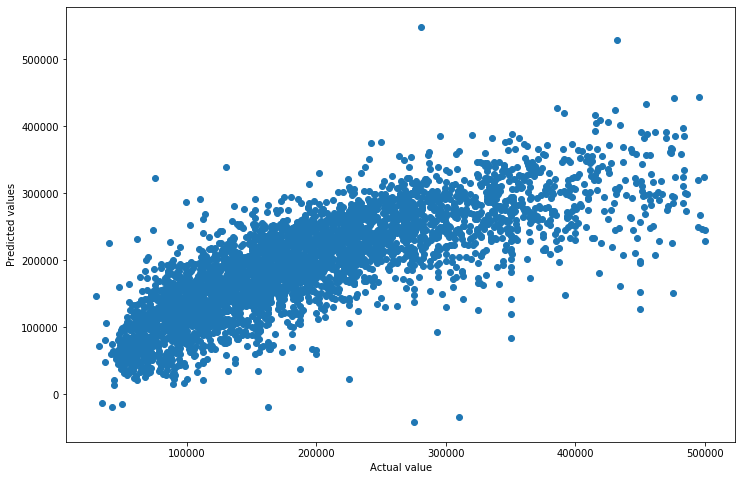

In [79]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(y_test,y_pred)
plt.xlabel('Actual value')
plt.ylabel('Predicted values')

In [118]:
from platform import python_version

print(python_version())

print(df_pred_actual.shape)
df_pred_actual_sample = df_pred_actual.sample(10)
df_pred_actual_sample = df_pred_actual.reset_index()
print("After random sampling",df_pred_actual_sample.shape)

3.7.4
(3895, 2)


NameError: name 'random' is not defined

In [104]:
df_pred_actual_sample.shape

(3895, 3)

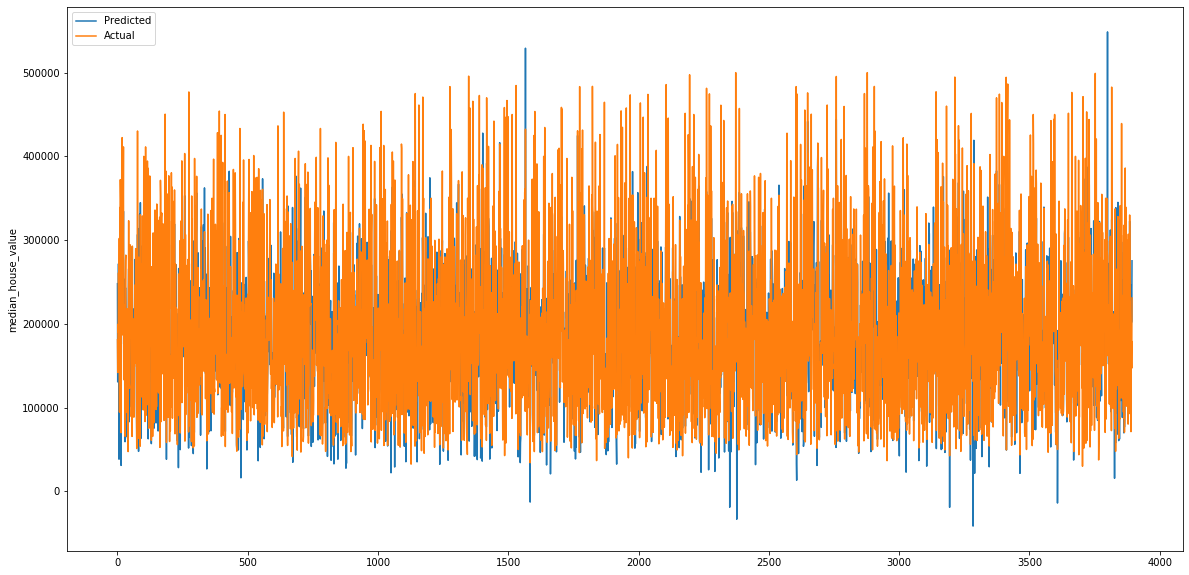

In [95]:
plt.figure (figsize = (20,10))
plt.plot(df_pred_actual_sample['predicted'],label='Predicted')
plt.plot(df_pred_actual_sample['actual'],label='Actual')

plt.ylabel('median_house_value')

plt.legend()
plt.show()